In [289]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from scipy.stats import boxcox
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

import seaborn as sns
sns.set_palette('husl')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import pickle
from flask import Flask, request

In [82]:
iris = datasets.load_iris()
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
"""
both the above and below method can convert the scikit learn dataset into pandas dataframe
"""
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target'] = pd.Series(iris.target)
target_names = iris.target_names

In [219]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [218]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [215]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [83]:
"""
converting iris target column back into string format
"""
for i in range(0, len(data.target)):
    j = data['target'][i]
    if j == 0:
        data['target'][i] = "setosa"
    elif j == 1:
        data['target'][i] = "versicolor"
    else:
        data['target'][i] = "virginica"

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [86]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [87]:
data['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

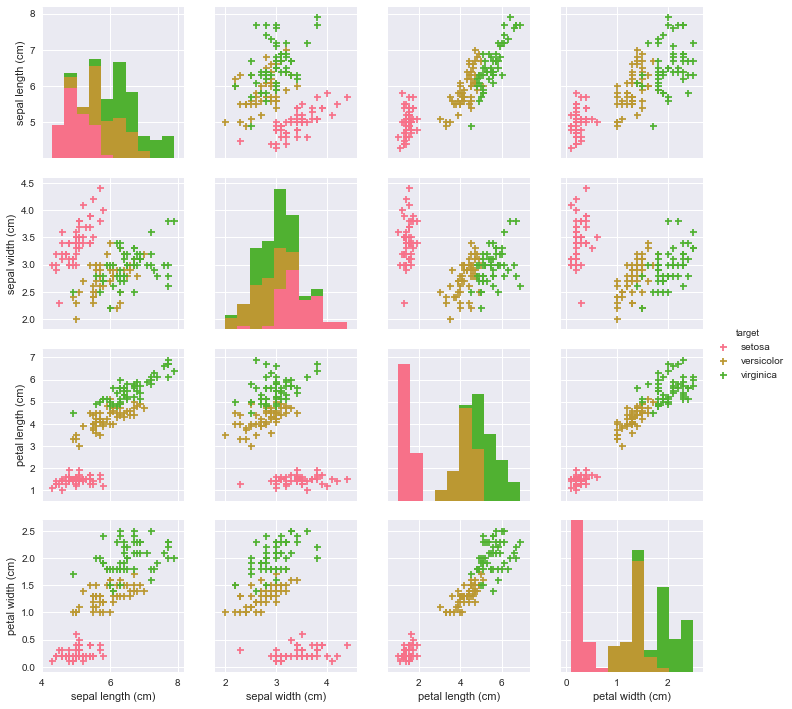

In [88]:
g = sns.pairplot(data, hue = 'target', markers = '+')
plt.show()

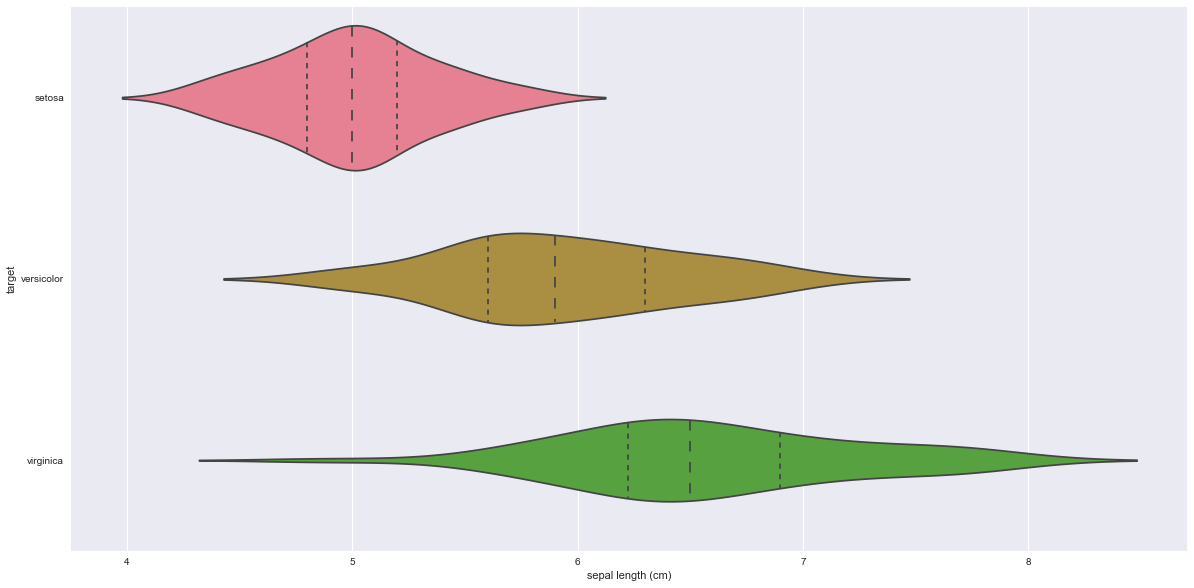

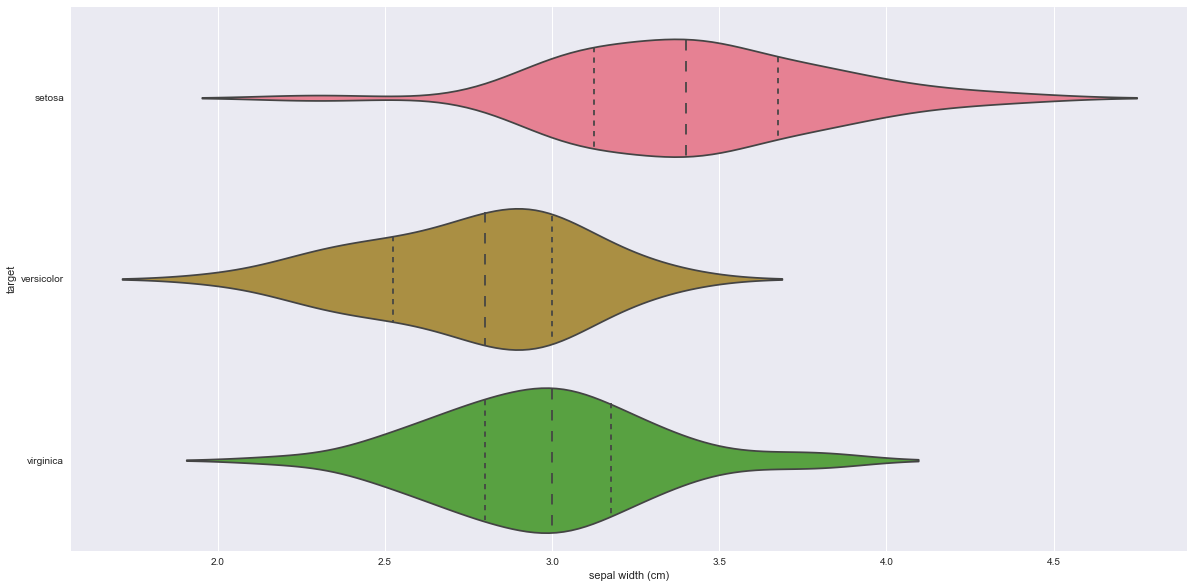

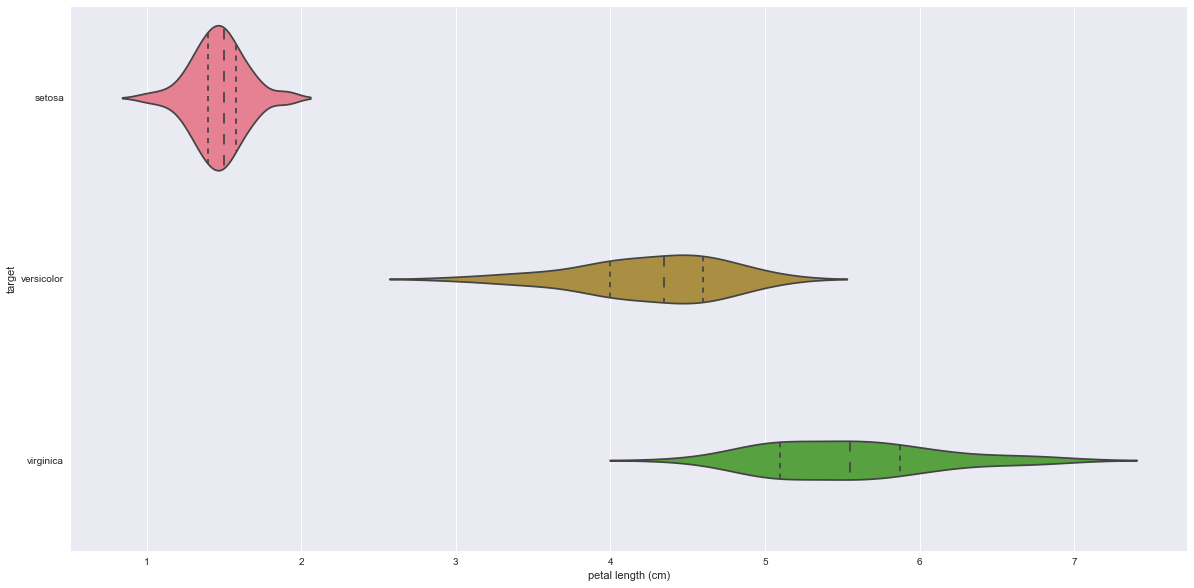

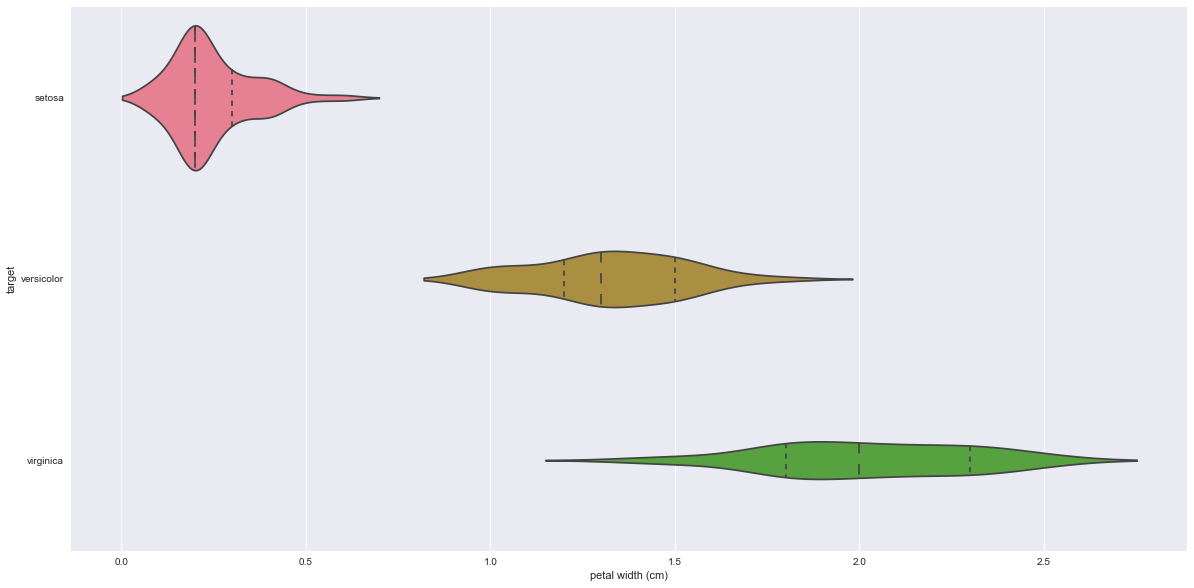

In [20]:
g = sns.violinplot(y = 'target', x = 'sepal length (cm)', data = data, inner = 'quartile')
plt.show()
g = sns.violinplot(y = 'target', x = 'sepal width (cm)', data = data, inner = 'quartile')
plt.show()
g = sns.violinplot(y = 'target', x = 'petal length (cm)', data = data, inner = 'quartile')
plt.show()
g = sns.violinplot(y = 'target', x = 'petal width (cm)', data = data, inner = 'quartile')
plt.show()

In [22]:
x = data.drop(['target'], axis = 1)
y = data['target']

In [23]:
print x.shape
print y.shape

(150, 4)
(150L,)


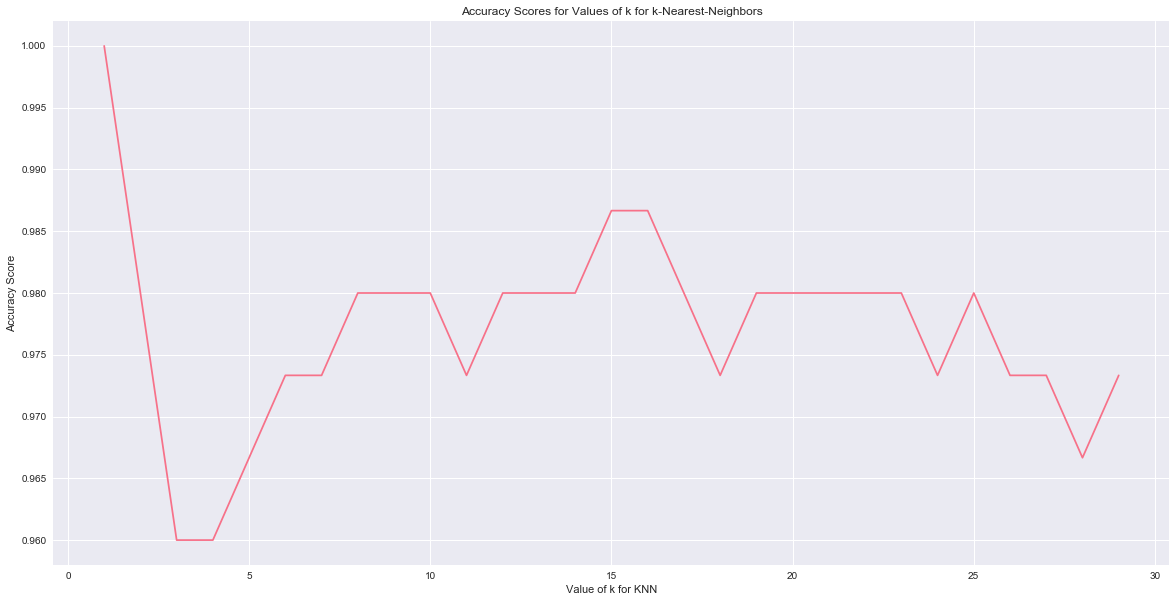

In [25]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k for k-Nearest-Neighbors')
plt.show()

In [26]:
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print metrics.accuracy_score(y, y_pred)

0.96


train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 15)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90L,)
(60, 4)
(60L,)


KNN Classifier

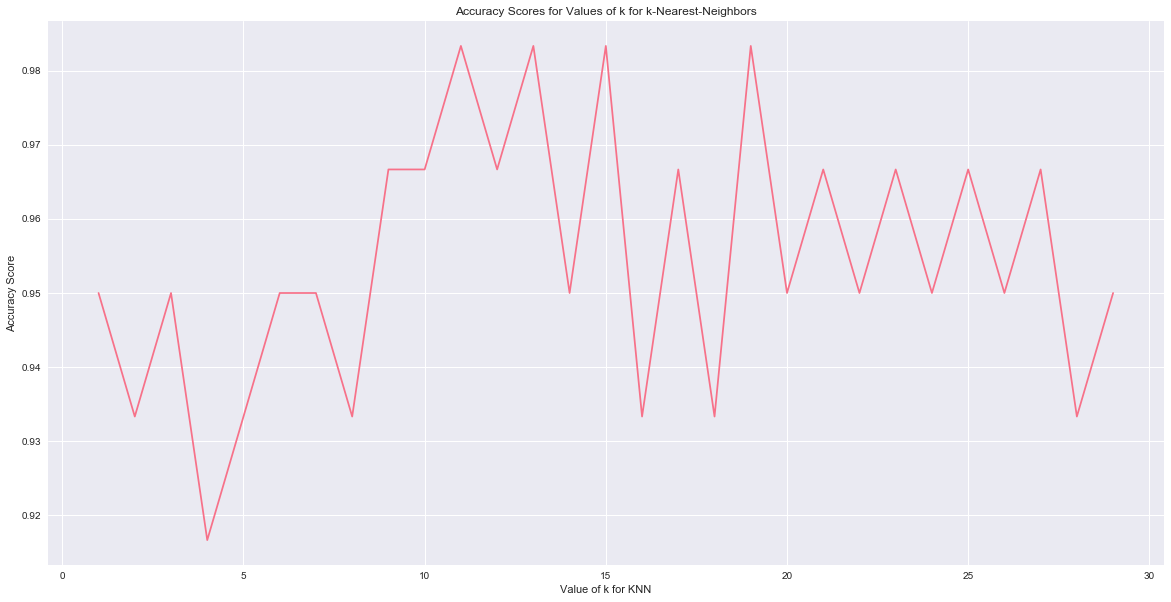

In [28]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k for k-Nearest-Neighbors')
plt.show()

In [221]:
# knn = KNeighborsClassifier()
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# metrics.accuracy_score(y_test, y_pred)

Logistic Regression

In [30]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print metrics.accuracy_score(y_test, y_pred)

0.983333333333


Random Forest Classifier

In [34]:
forestclf = RandomForestClassifier(n_estimators = 100)
forestclf.fit(x_train, y_train)
y_pred = forestclf.predict(x_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


Decision Tree Classifier

In [35]:
dtreeclf = DecisionTreeClassifier()
dtreeclf.fit(x_train, y_train)
y_pred = dtreeclf.predict(x_test)
print metrics.accuracy_score(y_test, y_pred)

0.916666666667


Linear SVC Classifier

0.966666666667


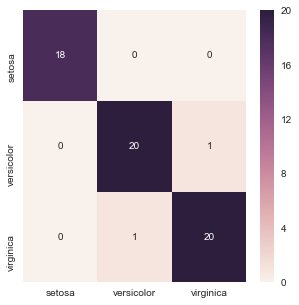

In [40]:
linear_svc_clf = LinearSVC()
linear_svc_clf.fit(x_train, y_train.ravel())
y_pred = linear_svc_clf.predict(x_test)
print linear_svc_clf.score(x_test, y_test.ravel())
cm = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)], columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot = True)

SVC Classifier

1.0


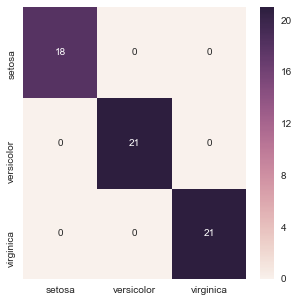

In [41]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train.ravel())
y_pred = svc_clf.predict(x_test)
print svc_clf.score(x_test, y_test.ravel())
cm = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)], columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot = True)

Feature Scaling is a method of limit the range of variables so that they can be compared on commom grounds. It is performed on continuous variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001251E6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010AA3BE0>]], dtype=object)

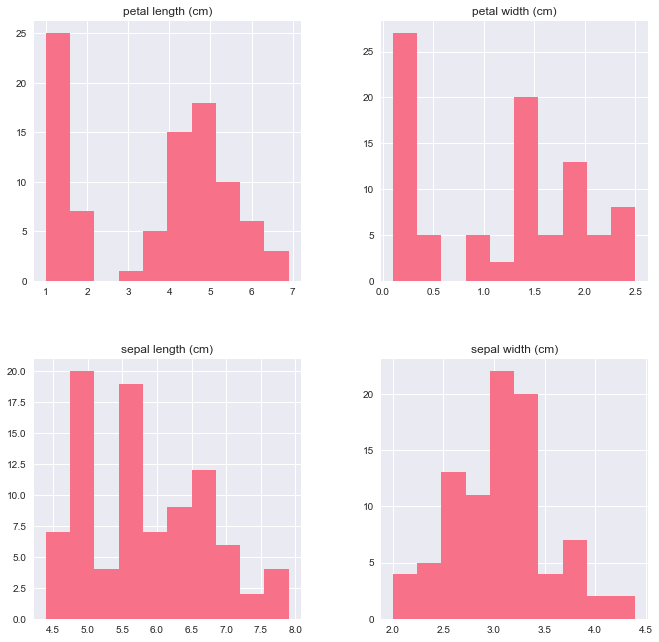

In [42]:
x_train[x_train.dtypes[(x_train.dtypes=="float64")|(x_train.dtypes=="int64")].index.values].hist(figsize=[11,11])

MinMax Scaler

In [223]:
min_max = MinMaxScaler()
x_train_minmax = min_max.fit_transform(x_train)
x_test_minmax = min_max.fit_transform(x_test)

In [224]:
x_train_minmax.max()

1.0

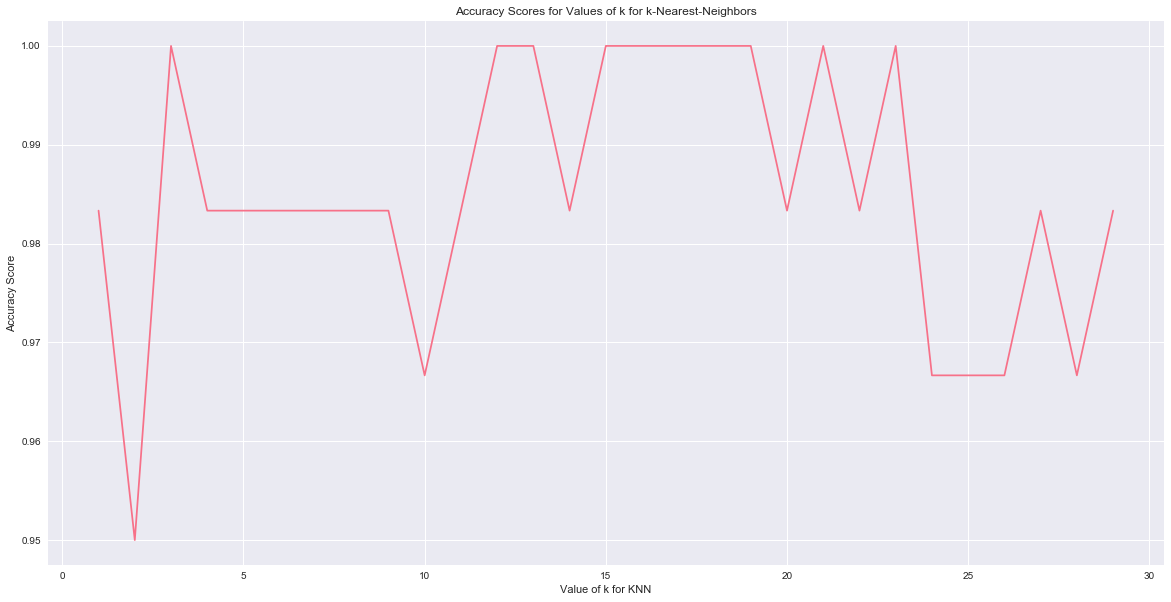

In [47]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_minmax, y_train)
    y_pred = knn.predict(x_test_minmax)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k for k-Nearest-Neighbors')
plt.show()

In [49]:
logreg = LogisticRegression()
logreg.fit(x_train_minmax, y_train)
y_pred = logreg.predict(x_test_minmax)
print metrics.accuracy_score(y_test, y_pred)

0.85


Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

In [53]:
x_train_scale = scale(x_train)
x_test_scale = scale(x_test)

In [54]:
logreg = LogisticRegression()
logreg.fit(x_train_scale, y_train)
y_pred = logreg.predict(x_test_scale)
print metrics.accuracy_score(y_test, y_pred)

1.0


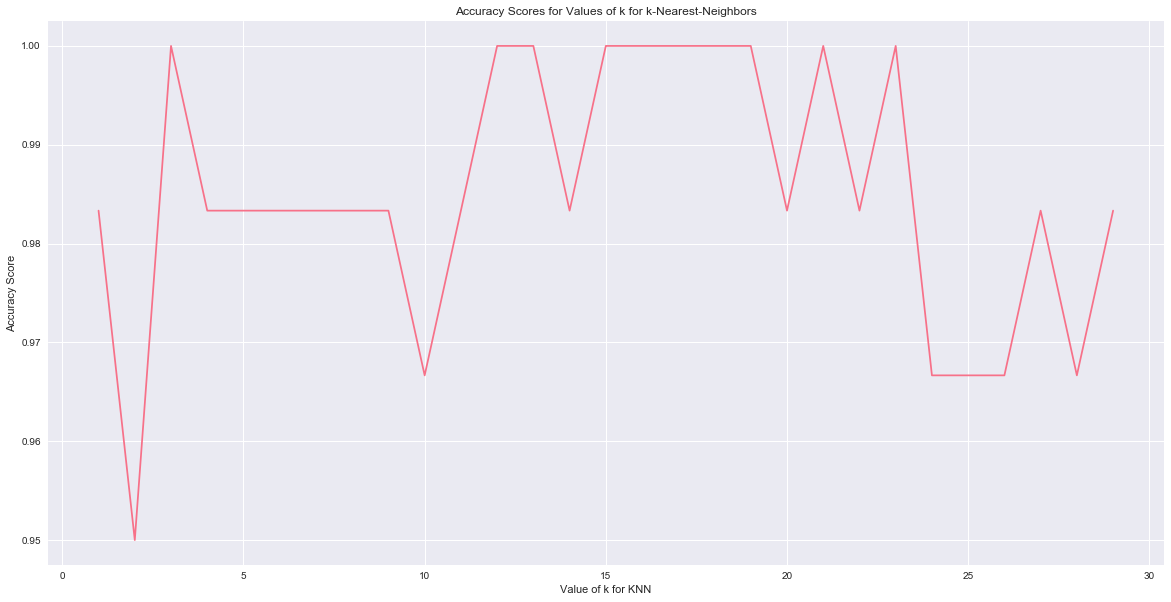

In [55]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_minmax, y_train)
    y_pred = knn.predict(x_test_minmax)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k for k-Nearest-Neighbors')
plt.show()

Label Encoding

In [110]:
titanic_raw = pd.read_csv(r'C:\tfs\GCCSDevSupport.GCCS\Releases\2018_GCCS_Enhancements\DataScience\Model_API\DATASET_EXCEL_FILES (non usable)\titanic.csv')
titanic_raw = titanic_raw.fillna(0)

In [111]:
titan_x = titanic_raw.drop(['Survived'], axis = 1)
titan_y = pd.Series(titanic_raw['Survived'])

In [112]:
forestclf = RandomForestClassifier(n_estimators = 100)
forestclf.fit(titan_x, titan_y)
y_pred = forestclf.predict(titan_x)
print metrics.accuracy_score(titan_y, y_pred)

ValueError: could not convert string to float: Q

In [113]:
x_train_titan, x_test_titan, y_train_titan, y_test_titan = train_test_split(titan_x, titan_y, test_size = 0.4, random_state = 15)
le = LabelEncoder()
for col in x_test_titan.columns.values:
    if x_test_titan[col].dtypes == 'object':
        titan_data = x_train_titan[col].append(x_test_titan[col])
        le.fit(titan_data.values)
        x_train_titan[col] = le.transform(x_train_titan[col])
        x_test_titan[col] = le.transform(x_test_titan[col])

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
x_train_titan

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
68,69,3,25,0,17.0,4,2,248,7.9250,0,3
708,709,1,163,0,22.0,0,0,37,151.5500,0,3
467,468,1,766,1,56.0,0,0,44,26.5500,0,3
195,196,1,495,0,58.0,0,0,586,146.5208,44,1
9,10,2,576,0,14.0,1,0,132,30.0708,0,1
659,660,1,584,1,58.0,0,2,416,113.2750,109,1
241,242,3,567,0,0.0,1,0,444,15.5000,0,2
64,65,1,784,1,0.0,0,0,601,27.7208,0,1
89,90,3,149,1,24.0,0,0,297,8.0500,0,3
328,329,3,295,0,31.0,1,1,423,20.5250,0,3


In [115]:
forestclf = RandomForestClassifier(n_estimators = 100)
forestclf.fit(x_train_titan, y_train_titan)
y_pred = forestclf.predict(x_test_titan)
print metrics.accuracy_score(y_test_titan, y_pred)

0.809523809524


One Hot Encoding

In [117]:
titanic_raw = pd.read_csv(r'C:\tfs\GCCSDevSupport.GCCS\Releases\2018_GCCS_Enhancements\DataScience\Model_API\DATASET_EXCEL_FILES (non usable)\titanic.csv')
titanic_raw = titanic_raw.fillna(0)

In [119]:
titan_x = titanic_raw.drop(['Survived'], axis = 1)
titan_y = pd.Series(titanic_raw['Survived'])
titan_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [121]:
x_train_titan, x_test_titan, y_train_titan, y_test_titan = train_test_split(titan_x, titan_y, test_size = 0.4, random_state = 15)
x_train_titan_ohe = pd.get_dummies(x_train_titan)
x_test_titan_ohe = pd.get_dummies(x_test_titan)
final_x_train_titan, final_x_test_titan = x_train_titan_ohe.align(x_test_titan_ohe, join = 'left', axis = 1)

In [123]:
final_x_train_titan.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
68,69,3,17.0,4,2,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
708,709,1,22.0,0,0,151.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
467,468,1,56.0,0,0,26.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
195,196,1,58.0,0,0,146.5208,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,10,2,14.0,1,0,30.0708,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [124]:
final_x_test_titan.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
310,311,1,24.0,0,0,83.1583,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,0,NaN,1,0,0
635,636,2,28.0,0,0,13.0000,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,0,NaN,0,0,1
44,45,3,19.0,0,0,7.8792,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,0,NaN,0,1,0
698,699,1,49.0,1,1,110.8833,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,0,NaN,1,0,0
750,751,2,4.0,1,1,23.0000,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,0,NaN,0,0,1


Feature Extraction on Titanic Dataset

In [152]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [199]:
def plot_learning_curve(estimator, title, x, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Traning Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [201]:
def plot_validation_curve(estimator, title, x, y, param_name, param_range, ylim=None, cv=None,n_jobs=1,
                          train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, x, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [173]:
titanic = pd.read_csv(r'C:\tfs\GCCSDevSupport.GCCS\Releases\2018_GCCS_Enhancements\DataScience\Model_API\DATASET_EXCEL_FILES (non usable)\titanic.csv')
titanic_raw = titanic.copy()

In [174]:
titanic_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [175]:
titanic_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [176]:
draw_missing_data_table(titanic_raw)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Survived,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000


In [177]:
titanic_raw = titanic_raw.drop(['Cabin'], axis = 1)
titanic_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [178]:
value = 200
titanic_raw['Age'] = titanic_raw['Age'].fillna(200)
titanic_raw['Age'].max()

200.0

In [179]:
titanic_raw = titanic_raw.drop(titanic_raw[pd.isnull(titanic_raw['Embarked'])].index)
titanic_raw[pd.isnull(titanic_raw['Embarked'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived


In [180]:
draw_missing_data_table(titanic_raw)

,Total,Percent
Survived,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [181]:
titanic_raw.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived         int64
dtype: object

In [183]:
titanic_raw = titanic_raw.drop(['PassengerId'], axis = 1)
titanic_raw.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [184]:
titanic_raw['Sex'] = pd.Categorical(titanic_raw['Sex'])
titanic_raw['Embarked'] = pd.Categorical(titanic_raw['Embarked'])

In [185]:
titanic_raw['Family_size'] = titanic_raw['SibSp'] + titanic_raw['Parch']
titanic_raw.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family_size
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [186]:
titanic_raw = titanic_raw.drop(['SibSp','Parch'], axis = 1)
titanic_raw.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Survived,Family_size
0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,1
4,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0


In [187]:
titanic_raw = titanic_raw.drop(['Name','Ticket'], axis = 1)
titanic_raw.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Family_size
0,3,male,22.0,7.2500,S,0,1
1,1,female,38.0,71.2833,C,1,1
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,1
4,3,male,35.0,8.0500,S,0,0


In [188]:
titanic_raw = pd.get_dummies(titanic_raw, drop_first = True)
titanic_raw.head()

,Pclass,Age,Fare,Survived,Family_size,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,1,0,1
1,1,38.0,71.2833,1,1,0,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,1
4,3,35.0,8.0500,0,0,1,0,1


In [189]:
x = titanic_raw[titanic_raw.loc[:, titanic_raw.columns != 'Survived'].columns]
y = titanic_raw['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 15)

In [192]:
print "Inputs:\n", x_train.head()
print "Output:\n", y_train.head()

Inputs:
     Pclass    Age      Fare  Family_size  Sex_male  Embarked_Q  Embarked_S
783       3  200.0   23.4500            3         1           0           1
196       3  200.0    7.7500            0         1           1           0
9         2   14.0   30.0708            1         0           0           0
659       1   58.0  113.2750            2         1           0           0
242       2   29.0   10.5000            0         1           0           1
Output:
783    0
196    0
9      1
659    0
242    0
Name: Survived, dtype: int64


In [193]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
score = cross_val_score(logreg, x_train, y_train, cv = 10)
print "CV accuracy: %.3f +/- %.3f"%(np.mean(score), np.std(score))

CV accuracy: 0.813 +/- 0.055


<module 'matplotlib.pyplot' from 'C:\Program Files\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

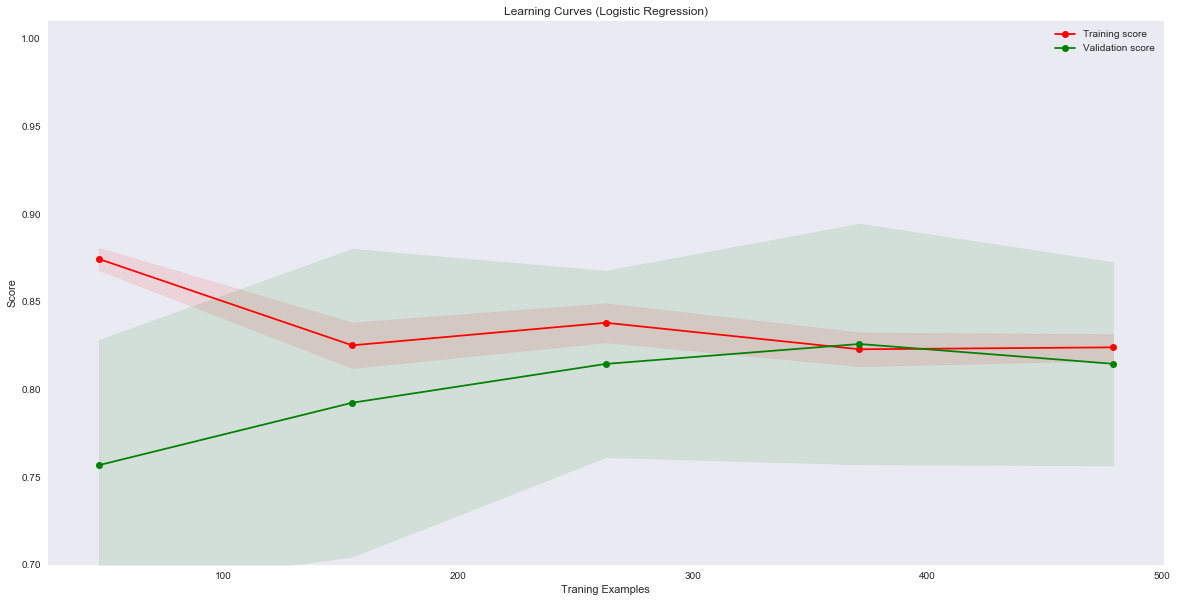

In [200]:
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, x_train, y_train, ylim = (0.7,1.01), cv = cv, n_jobs = 1)

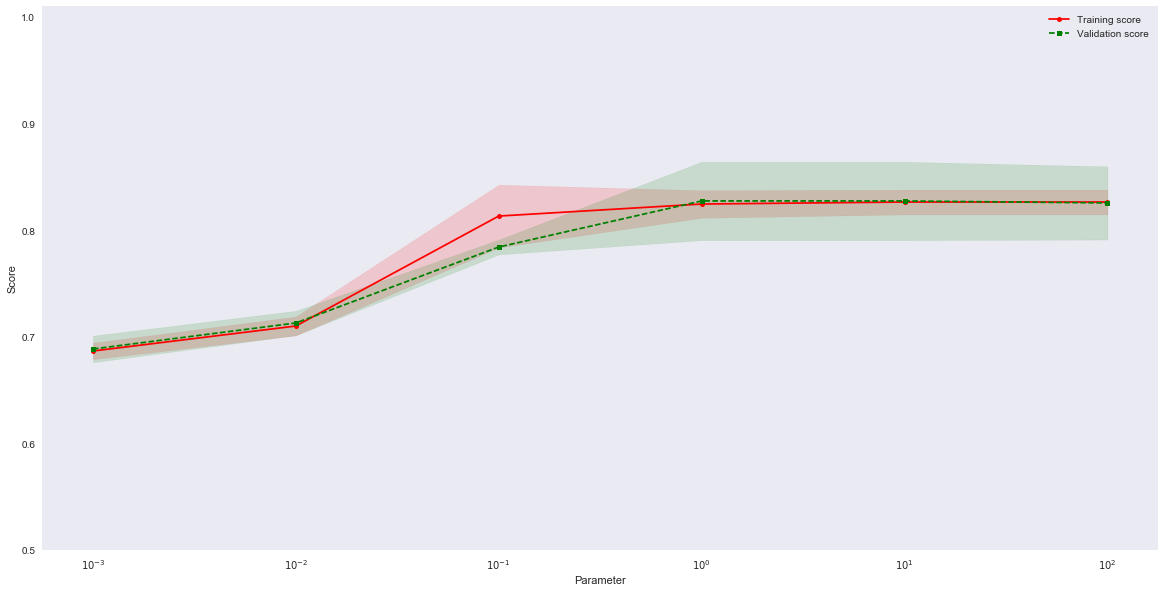

In [202]:
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
cv = 10
plot_validation_curve(estimator = logreg, title = title,x = x_train, y = y_train, param_name = param_name,
                     ylim = (0.5, 1.01), param_range = param_range)

In [203]:
titanic_raw.head()

,Pclass,Age,Fare,Survived,Family_size,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,1,0,1
1,1,38.0,71.2833,1,1,0,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,1
4,3,35.0,8.0500,0,0,1,0,1


In [205]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [206]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic_new = titanic.drop(['SibSp','Parch','Name','Ticket','Cabin'], axis = 1)
titanic_new.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize
0,1,3,male,22.0,7.2500,S,0,1
1,2,1,female,38.0,71.2833,C,1,1
2,3,3,female,26.0,7.9250,S,1,0
3,4,1,female,35.0,53.1000,S,1,1
4,5,3,male,35.0,8.0500,S,0,0


In [207]:
titanic['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [208]:
titanic_new['Title'] = 0
for i in titanic_new:
    titanic_new['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.', expand = False)
titanic_new.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize,Title
0,1,3,male,22.0,7.2500,S,0,1,Mr
1,2,1,female,38.0,71.2833,C,1,1,Mrs
2,3,3,female,26.0,7.9250,S,1,0,Miss
3,4,1,female,35.0,53.1000,S,1,1,Mrs
4,5,3,male,35.0,8.0500,S,0,0,Mr


In [209]:
titanic_new['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

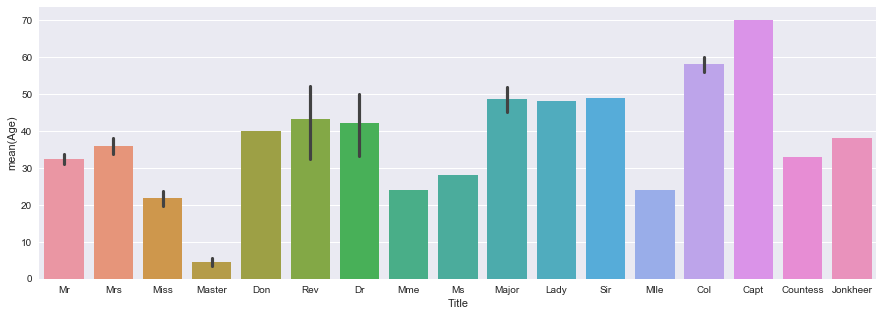

In [210]:
plt.figure(figsize = (15,5))
sns.barplot(x = titanic_new['Title'], y = titanic_new['Age'])

In [212]:
titanic['Title'] = titanic_new['Title']
means = titanic.groupby('Title')['Age'].mean()
means

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [213]:
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.5741666666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [225]:
index_null_age = titanic_new.loc[np.isnan(titanic_new['Age'])].index
titanic_new.loc[index_null_age, 'Age'].loc[index_null_age] = titanic_new['Title'].loc[index_null_age].map(map_means)
titanic_new.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize,Title
0,1,3,male,22.0,7.2500,S,0,1,Mr
1,2,1,female,38.0,71.2833,C,1,1,Mrs
2,3,3,female,26.0,7.9250,S,1,0,Miss
3,4,1,female,35.0,53.1000,S,1,1,Mrs
4,5,3,male,35.0,8.0500,S,0,0,Mr


In [226]:
titanic_new['Imputed'] = 0
titanic_new.at[index_null_age.values, 'Imputed'] = 1
titanic_new.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize,Title,Imputed
0,1,3,male,22.0,7.2500,S,0,1,Mr,0
1,2,1,female,38.0,71.2833,C,1,1,Mrs,0
2,3,3,female,26.0,7.9250,S,1,0,Miss,0
3,4,1,female,35.0,53.1000,S,1,1,Mrs,0
4,5,3,male,35.0,8.0500,S,0,0,Mr,0


Correlational Matrix

In [227]:
titanic_new.corr()

,PassengerId,Pclass,Age,Fare,Survived,FamilySize,Imputed
PassengerId,1.000000,-0.035144,0.036847,0.012658,-0.005007,-0.040143,-0.020167
Pclass,-0.035144,1.000000,-0.369226,-0.549500,-0.338481,0.065997,0.172933
Age,0.036847,-0.369226,1.000000,0.096067,-0.077221,-0.301914,NaN
Fare,0.012658,-0.549500,0.096067,1.000000,0.257307,0.217138,-0.100707
Survived,-0.005007,-0.338481,-0.077221,0.257307,1.000000,0.016639,-0.092197
FamilySize,-0.040143,0.065997,-0.301914,0.217138,0.016639,1.000000,-0.049043
Imputed,-0.020167,0.172933,NaN,-0.100707,-0.092197,-0.049043,1.000000


Hypothesis Driven Approach in problem solving

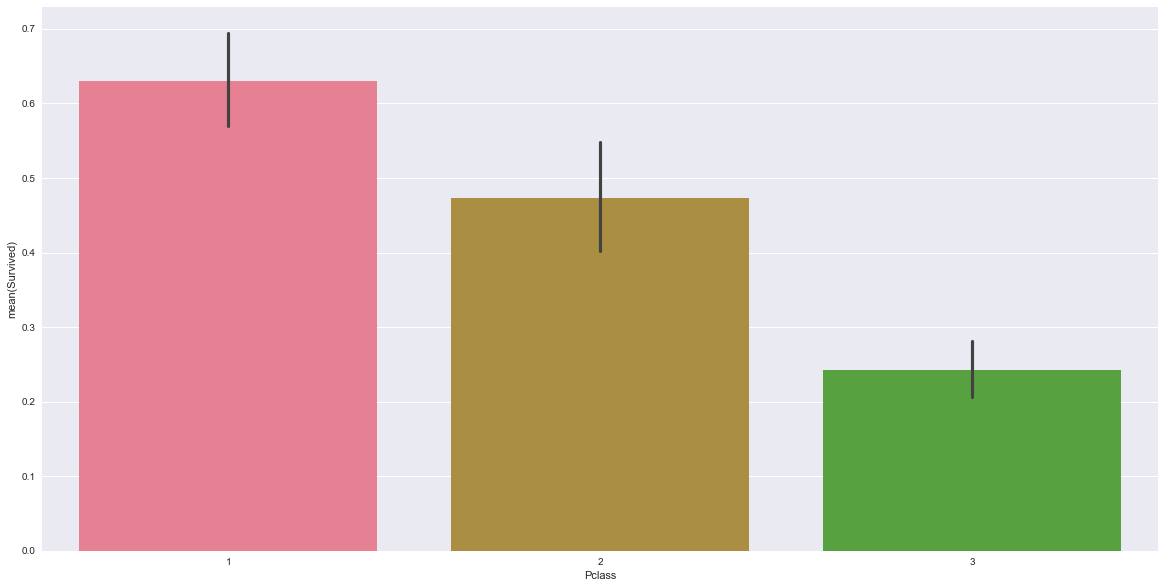

In [228]:
sns.barplot(titanic_new['Pclass'], titanic_new['Survived'])

In [229]:
titanic_new.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [230]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'} 

In [231]:
titanic_new['Title'] = titanic_new['Title'].map(titles_dict)
titanic_new['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [232]:
titanic_new['Title'] = pd.Categorical(titanic_new['Title'])
titanic_new.dtypes

PassengerId       int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
Survived          int64
FamilySize        int64
Title          category
Imputed           int64
dtype: object

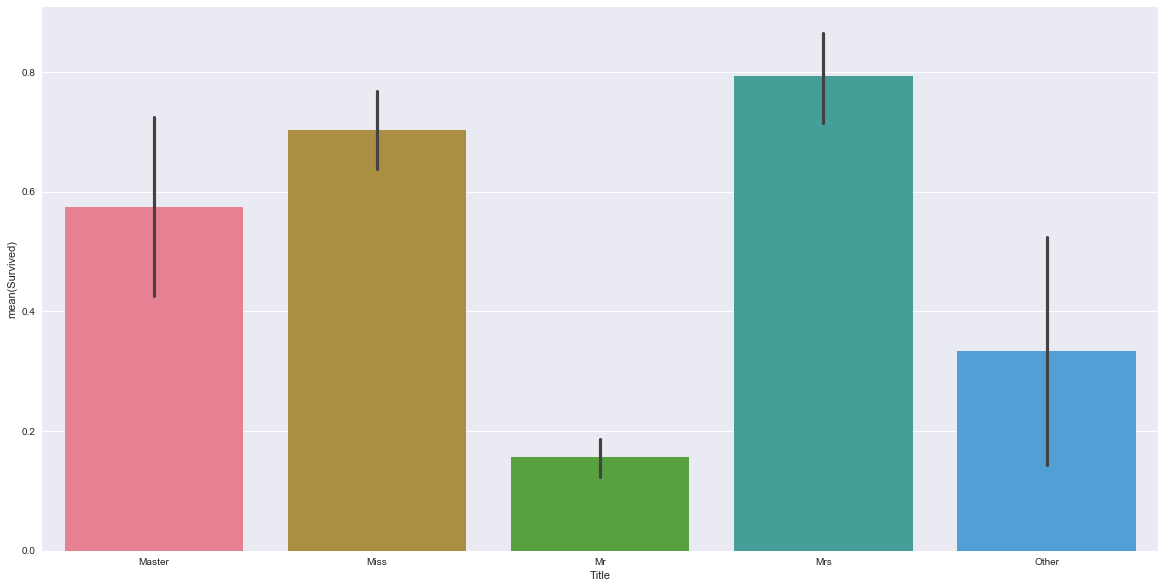

In [233]:
sns.barplot(x = 'Title', y = 'Survived', data = titanic_new)

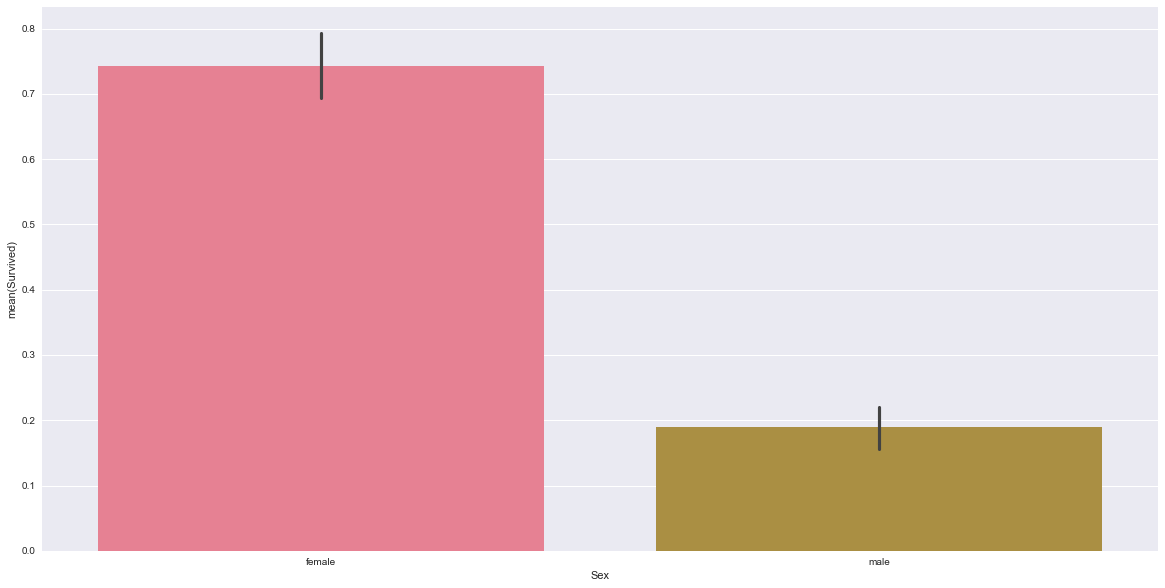

In [235]:
titanic_new['Sex'] = pd.Categorical(titanic_new['Sex'])
sns.barplot(titanic_new['Sex'], titanic_new['Survived'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

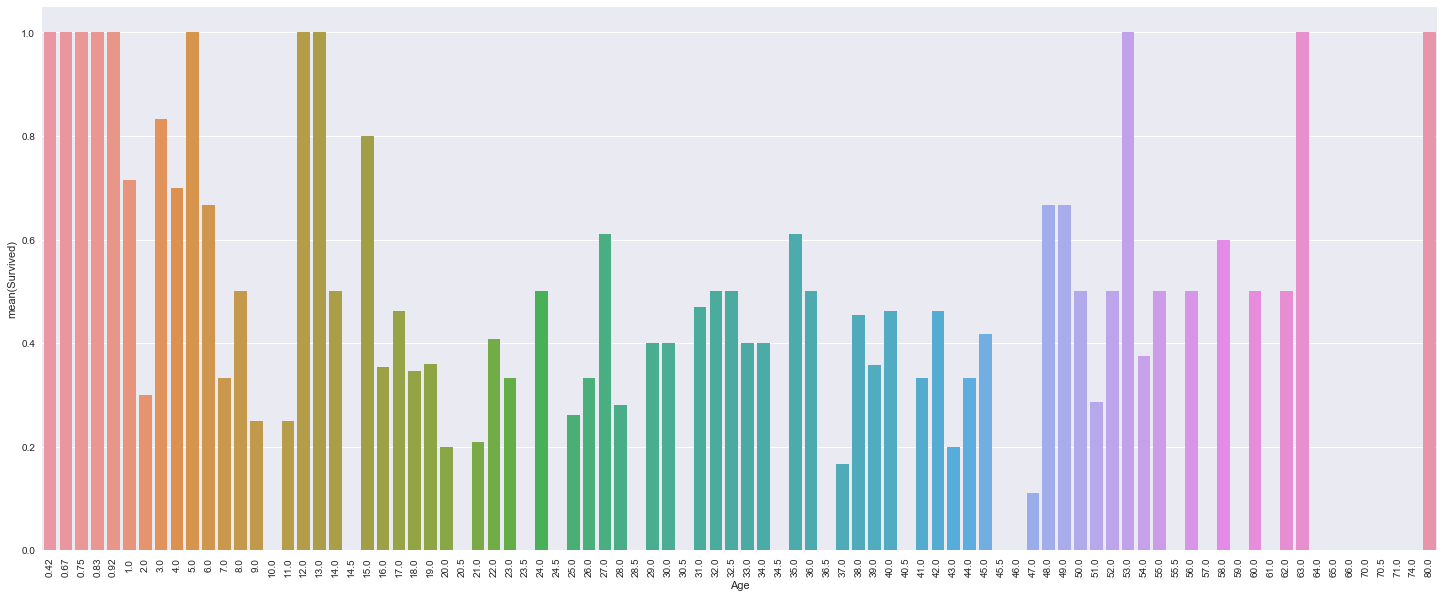

In [242]:
plt.figure(figsize = (25, 10))
sns.barplot(titanic_new['Age'], titanic_new['Survived'], ci = None)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

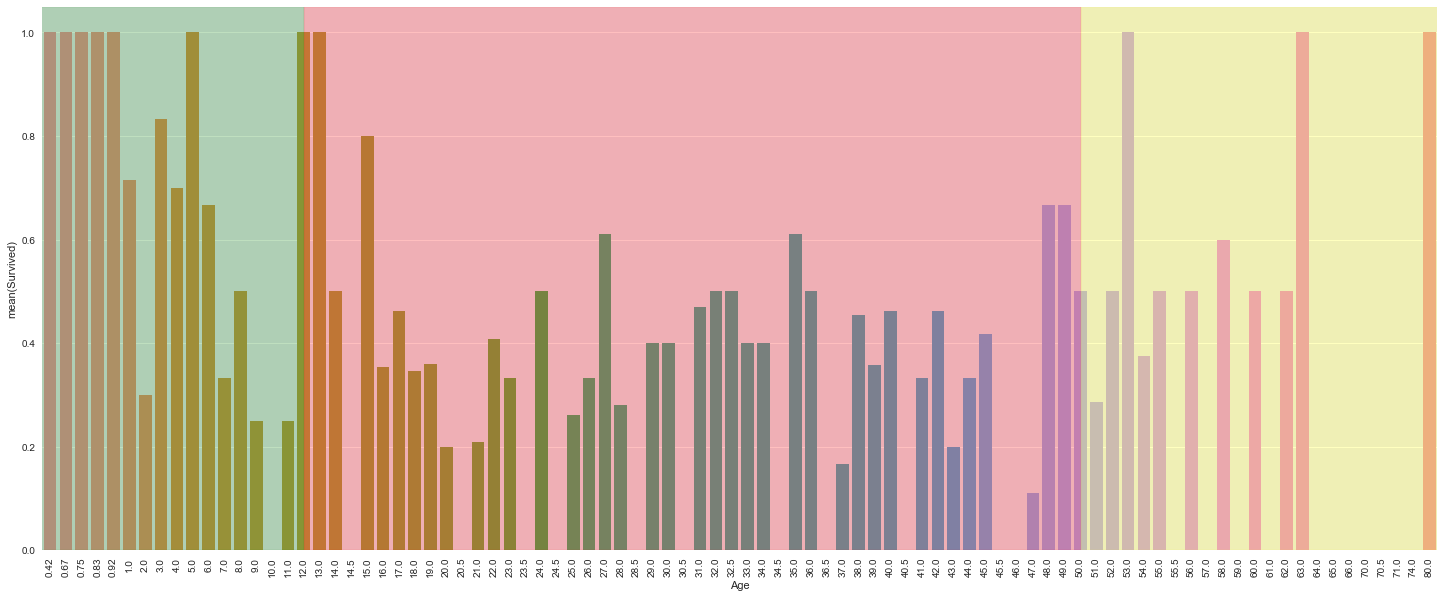

In [243]:
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(titanic_new[titanic_new['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(titanic_new[titanic_new['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(titanic_new['Age'],titanic_new['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [244]:
titanic_new['Age'] = pd.cut(titanic_new['Age'], bins = [0,10,50,200], labels = ['Child','Adult','Elder'])
titanic_new['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

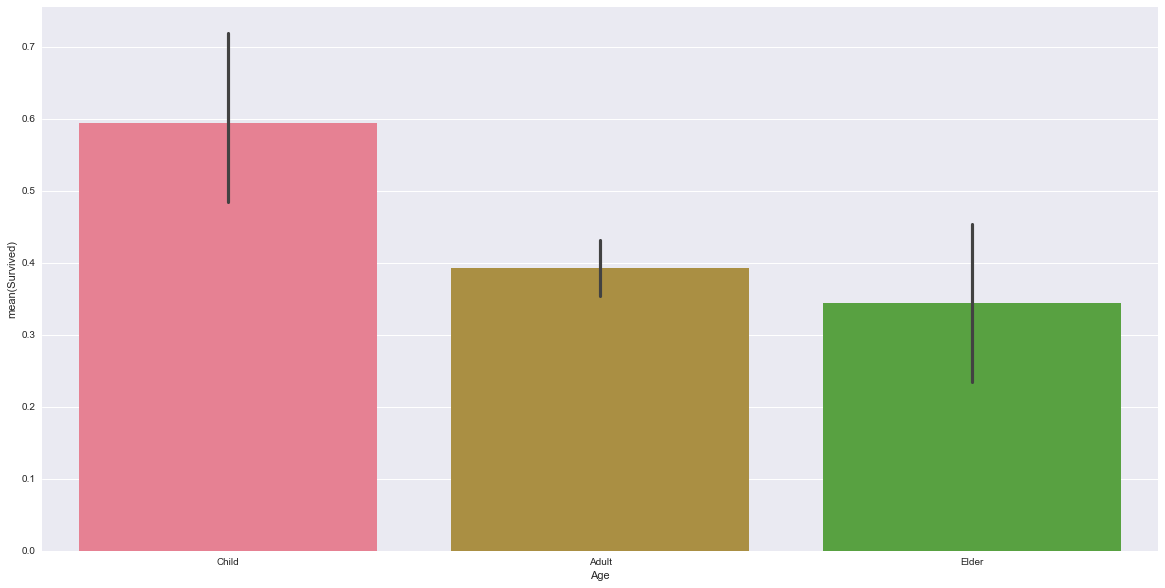

In [246]:
sns.barplot(titanic_new['Age'],titanic['Survived'])

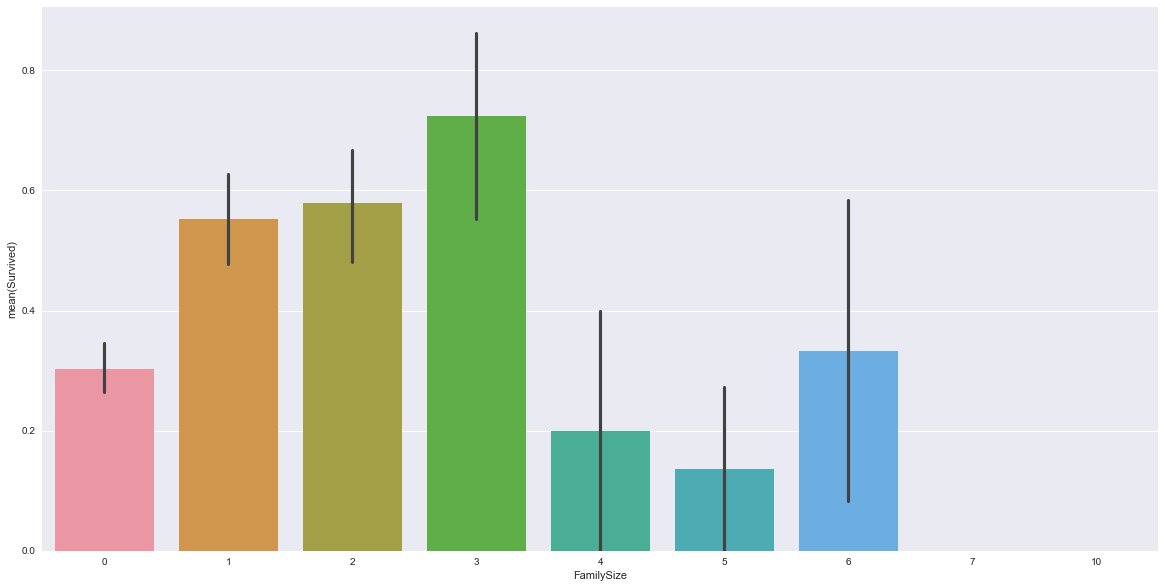

In [247]:
sns.barplot(titanic_new['FamilySize'],titanic_new['Survived'])

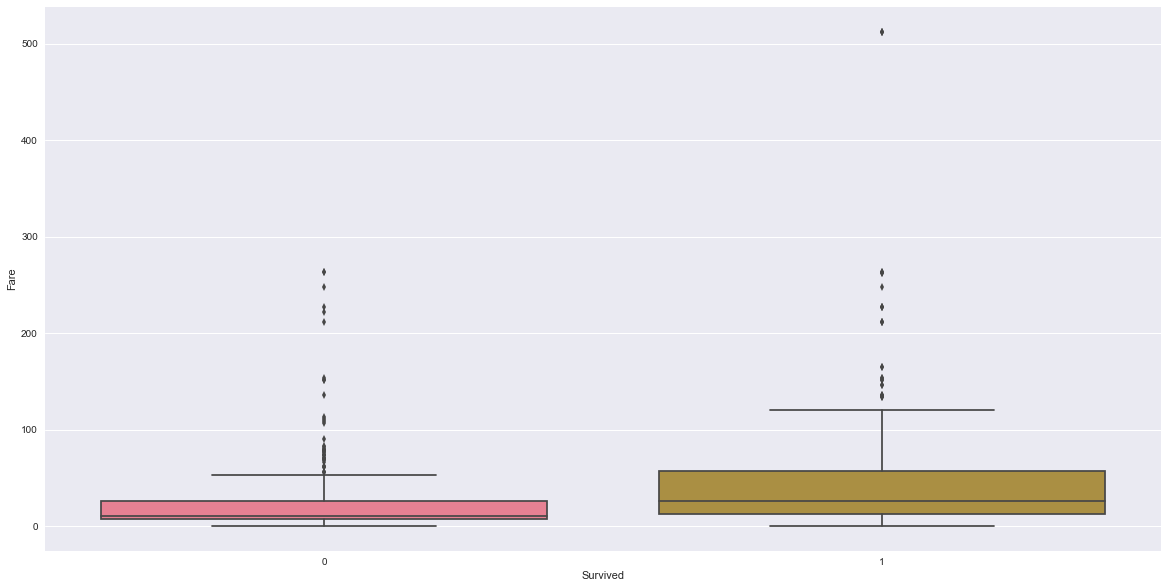

In [249]:
sns.boxplot(titanic_new['Survived'], titanic_new['Fare'])

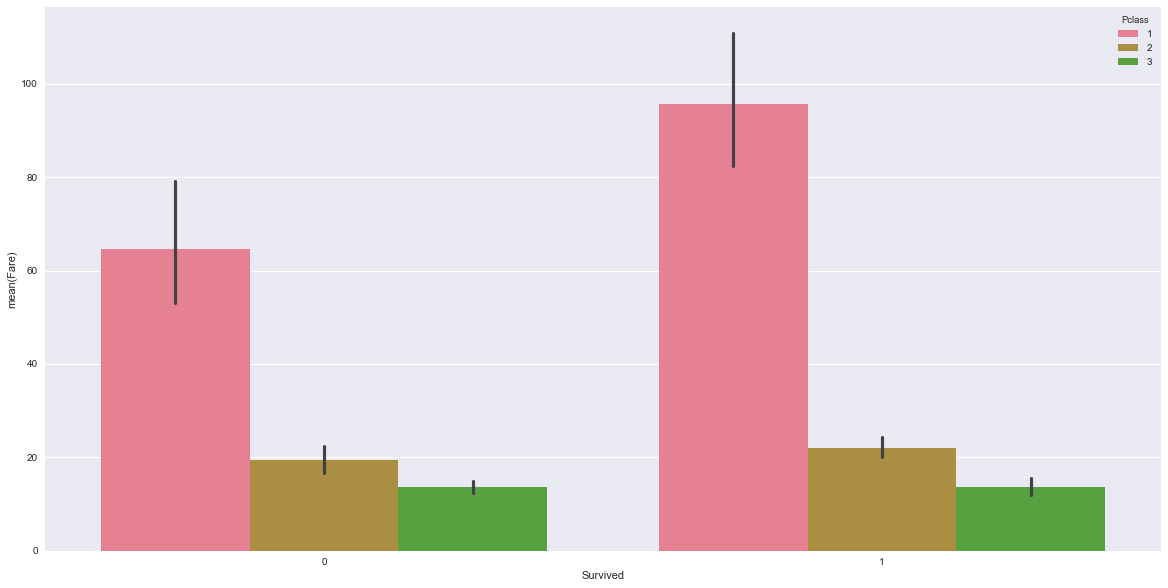

In [250]:
sns.barplot(titanic_new['Survived'], titanic_new['Fare'], titanic_new['Pclass'])

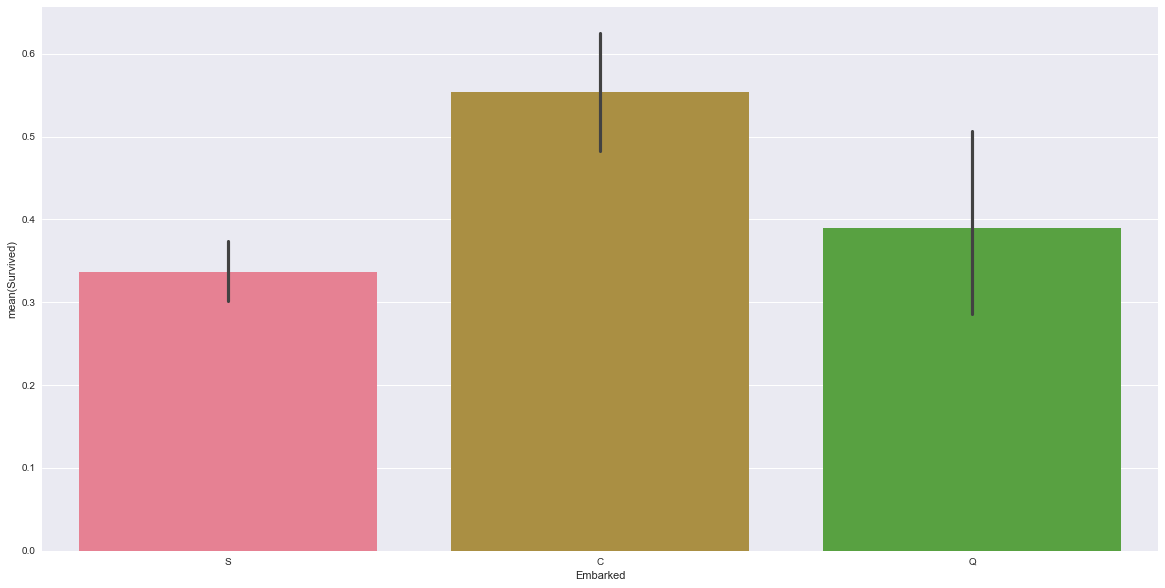

In [252]:
sns.barplot(titanic_new['Embarked'], titanic_new['Survived'])

In [253]:
titanic_new.groupby(['Embarked']).mean()

,PassengerId,Pclass,Fare,Survived,FamilySize,Imputed
Embarked,,,,,,
C,445.357143,1.886905,59.954144,0.553571,0.750000,0.226190
Q,417.896104,2.909091,13.276030,0.389610,0.597403,0.636364
S,449.527950,2.350932,27.079812,0.336957,0.984472,0.139752


In [254]:
titanic_new.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child      9
          Adult    106
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     51
          Adult    458
          Elder     45
Name: PassengerId, dtype: int64

In [255]:
titanic_new.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

Feature Engineering

In [256]:
titanic_new = titanic_new.drop(['PassengerId'], axis = 1)
titanic_new.dtypes

Pclass           int64
Sex           category
Age           category
Fare           float64
Embarked        object
Survived         int64
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [257]:
titanic_new['Embarked'] = pd.Categorical(titanic_new['Embarked'])
titanic_new['Pclass'] = pd.Categorical(titanic_new['Pclass'])
titanic_new.dtypes

Pclass        category
Sex           category
Age           category
Fare           float64
Embarked      category
Survived         int64
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [258]:
titanic_new = pd.get_dummies(titanic_new, drop_first = 1)
titanic_new.head()

,Fare,Survived,FamilySize,Imputed,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,7.2500,0,1,0,0,1,1,1,0,0,1,0,1,0,0
1,71.2833,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2,7.9250,1,0,0,0,1,0,1,0,0,1,1,0,0,0
3,53.1000,1,1,0,0,0,0,1,0,0,1,0,0,1,0
4,8.0500,0,0,0,0,1,1,1,0,0,1,0,1,0,0


In [260]:
x = titanic_new[titanic_new.loc[:, titanic_new.columns != 'Survived'].columns]
y = titanic_new['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=15)

BoxCox transformation

In [262]:
x_train_transform = x_train.copy()
x_train_transform['Fare'] = boxcox(x_train_transform['Fare'] + 1)[0]
x_test_transform = x_test.copy()
x_test_transform['Fare'] = boxcox(x_test_transform['Fare'] + 1)[0]

Polynomial transformation

In [265]:
minmax = MinMaxScaler()
x_train_transform_scale = minmax.fit_transform(x_train_transform)
x_test_transform_scale = minmax.fit_transform(x_test_transform)

In [269]:
poly = PolynomialFeatures(degree = 2).fit(x_train_transform)
x_train_poly = poly.transform(x_train_transform_scale)
x_test_poly = poly.transform(x_test_transform_scale)

In [270]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x8^2',
 'x8 x9',
 'x8 x10'

Feature Selection

In [273]:
logreg = LogisticRegression(C = 1)
logreg.fit(x_train, y_train)
scores = cross_val_score(logreg, x_train, y_train, cv = 10)
print "CV accuracy (original): %.3f +/- %.3f" % (np.mean(scores), np.std(scores))
highest_score = np.mean(scores)

for i in range(1, x_train_poly.shape[1] + 1, 1):
    select = SelectKBest(score_func = chi2, k = i)
    select.fit(x_train_poly, y_train)
    x_train_poly_selected = select.transform(x_train_poly)
    logreg.fit(x_train_poly_selected, y_train)
    scores = cross_val_score(logreg, x_train_poly_selected, y_train, cv = 10)
    print "CV accuracy (number of features = %i): %.3f +/- %.3f" %(i, np.mean(scores), np.std(scores))
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_feature_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) <  std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_feature_highest_score = i
print "Number of features when highest score: %i" % k_feature_highest_score

CV accuracy (original): 0.819 +/- 0.038
CV accuracy (number of features = 1): 0.781 +/- 0.044
CV accuracy (number of features = 2): 0.781 +/- 0.044
CV accuracy (number of features = 3): 0.781 +/- 0.044
CV accuracy (number of features = 4): 0.781 +/- 0.044
CV accuracy (number of features = 5): 0.781 +/- 0.044
CV accuracy (number of features = 6): 0.781 +/- 0.044
CV accuracy (number of features = 7): 0.789 +/- 0.042
CV accuracy (number of features = 8): 0.789 +/- 0.042
CV accuracy (number of features = 9): 0.789 +/- 0.042
CV accuracy (number of features = 10): 0.789 +/- 0.042
CV accuracy (number of features = 11): 0.789 +/- 0.042
CV accuracy (number of features = 12): 0.787 +/- 0.039
CV accuracy (number of features = 13): 0.785 +/- 0.043
CV accuracy (number of features = 14): 0.785 +/- 0.043
CV accuracy (number of features = 15): 0.785 +/- 0.043
CV accuracy (number of features = 16): 0.785 +/- 0.043
CV accuracy (number of features = 17): 0.785 +/- 0.043
CV accuracy (number of features = 

Fit model for best feature combination

In [274]:
select = SelectKBest(score_func = chi2, k = k_feature_highest_score)
select.fit(x_train_poly, y_train)
x_train_poly_selected = select.transform(x_train_poly)

In [275]:
logreg = LogisticRegression(C = 1)
logreg.fit(x_train_poly_selected, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [276]:
scores = cross_val_score(logreg, x_train_poly_selected, y_train, cv = 10)
print "CV accuracy: %.3f +/- %.3f" % (np.mean(scores), np.std(scores))

CV accuracy: 0.829 +/- 0.042


<module 'matplotlib.pyplot' from 'C:\Program Files\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

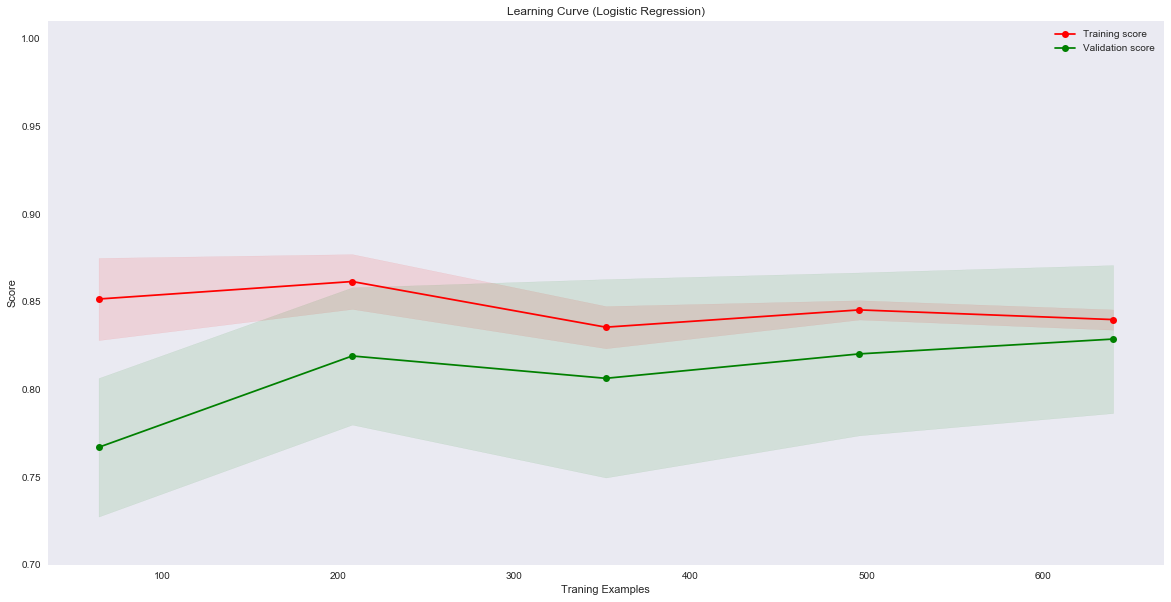

In [277]:
title = "Learning Curve (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, x_train_poly_selected, y_train, cv = cv, ylim = (0.7, 1.01), n_jobs = 1)

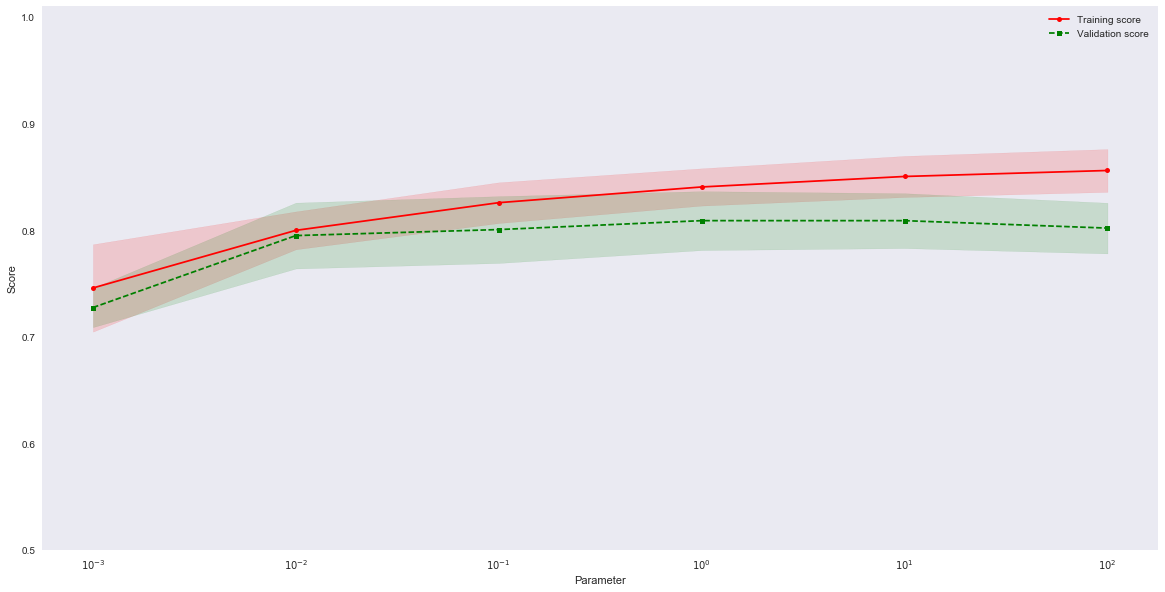

In [278]:
title = "Validation Curve (Logistic Regression)"
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
cv = 10
plot_validation_curve(estimator = logreg, title = title, x = x_train_poly_selected, y = y_train,
                      param_name = param_name, param_range = param_range, ylim = (0.5, 1.01))

Final Model Setup

In [279]:
titanic = pd.read_csv(r'C:\tfs\GCCSDevSupport.GCCS\Releases\2018_GCCS_Enhancements\DataScience\Model_API\DATASET_EXCEL_FILES (non usable)\titanic.csv')
titanic_raw = titanic.copy()

In [280]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.drop('SibSp',axis=1,inplace=True)
titanic.drop('Parch',axis=1,inplace=True)
titanic.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

titanic['Title']=0
for i in titanic:
    titanic['Title']=titanic_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  
titanic_raw['Title'] = titanic['Title']  
means = titanic_raw.groupby('Title')['Age'].mean()
map_means = means.to_dict()
idx_nan_age = titanic.loc[np.isnan(titanic['Age'])].index
titanic.loc[idx_nan_age, 'Age'] = titanic['Title'].loc[idx_nan_age].map(map_means)
titanic['Title'] = titanic['Title'].map(titles_dict)
titanic['Title'] = pd.Categorical(titanic['Title'])

titanic['Imputed'] = 0
titanic.at[idx_nan_age.values, 'Imputed'] = 1

titanic['Age'] = pd.cut(titanic['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])

passenger_id = titanic['PassengerId'].values
titanic.drop('PassengerId', axis=1, inplace=True)
titanic['Embarked'] = pd.Categorical(titanic['Embarked'])
titanic['Pclass'] = pd.Categorical(titanic['Pclass'])
titanic = pd.get_dummies(titanic, drop_first=1)

titanic = titanic.fillna(titanic.mean())  # There is one missing value in 'Fare'

x = titanic[titanic.loc[:, titanic.columns != 'Survived'].columns]

x_transformed = x.copy()
x_transformed['Fare'] = boxcox(x_transformed['Fare'] + 1)[0]

scaler = MinMaxScaler()
x_transformed_scaled = scaler.fit_transform(x_transformed)

poly = PolynomialFeatures(degree=2).fit(x_transformed)
x_poly = poly.transform(x_transformed_scaled)

x_poly_selected = select.transform(x_poly)

In [281]:
predictions = logreg.predict(x_poly_selected)

In [283]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0,

In [284]:
submission = pd.DataFrame({'PassengerId':passenger_id,
                          'Survived':predictions})

In [285]:
submission

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,1


In [287]:
filename = 'titanic_survival_predictor.pk'
with open('C:/tfs/GCCSDevSupport.GCCS/Releases/2018_GCCS_Enhancements/DataScience/Model_API/CODE_FILES/SPYDER_IDE/Predictive Failure Analysis/'+filename, 'wb') as file:
    pickle.dump(logreg, file)

In [ ]:
pred_result = submission.to_json(orient = 'index')
app = Flask(__name__)

@app.route('/Titanic_survival')
def getresult():
    return pred_result

if __name__ == '__main__':
    HOST = '127.0.0.1'
    PORT = 4000
    app.run(HOST, PORT)

 * Running on http://127.0.0.1:4000/ (Press CTRL+C to quit)
